# HOUSE PRICE PREDICTION

In [42]:
# Libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from keras import Model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.metrics import RootMeanSquaredError
from keras.layers import concatenate


## Import Image Data

In [3]:
image_path = "C:/Users/KIIT/Prerak/Prerak_Code/IoT Lab/week_3/Houses Dataset"
images_name = []
for i in os.listdir(image_path):
    if i[-3:] == "jpg":
        images_name.append(i)
        
j = 0
temp_store = []
combined_images = []
combined_images_index = []

for i in images_name:
    image = cv2.imread(image_path + "/" + i)
    image = cv2.resize(image,(32,32))
    temp_store.append(image)
    j+=1
    if (j == 4):
        combined = np.zeros((64,64,3), dtype = "uint8") #uint-8 as image to array is in range 0-255
        combined[0:32, 0:32] = temp_store[0]
        combined[0:32, 32:64] = temp_store[1]
        combined[32:64, 0:32] = temp_store[2]
        combined[32:64, 32:64] = temp_store[3]
        temp_store = []
        j = 0
        combined_images.append(combined)
        combined_images_index.append(i[:i.index("_")])
print("Images processed")

Images processed


In [63]:
print(combined_images[0])
combined_images_array = np.array(combined_images)
print(len(combined_images_array))
print(combined_images_array[0])

[[[129 147 158]
  [132 147 159]
  [135 148 160]
  ...
  [173 178 179]
  [182 187 188]
  [190 195 196]]

 [[129 145 157]
  [131 144 156]
  [129 143 153]
  ...
  [195 201 200]
  [197 203 202]
  [195 201 200]]

 [[137 149 159]
  [135 148 156]
  [134 144 153]
  ...
  [200 206 205]
  [191 197 196]
  [184 193 190]]

 ...

 [[161 162 182]
  [158 160 178]
  [156 160 179]
  ...
  [ 29  79 125]
  [  5  57 115]
  [  5  57 117]]

 [[159 165 179]
  [158 158 174]
  [  6  34  53]
  ...
  [141 165 184]
  [136 167 189]
  [  4  61 124]]

 [[ 49  98 101]
  [ 45  77  80]
  [ 19  54  55]
  ...
  [120 151 175]
  [136 166 187]
  [  7  52 109]]]
535
[[[129 147 158]
  [132 147 159]
  [135 148 160]
  ...
  [173 178 179]
  [182 187 188]
  [190 195 196]]

 [[129 145 157]
  [131 144 156]
  [129 143 153]
  ...
  [195 201 200]
  [197 203 202]
  [195 201 200]]

 [[137 149 159]
  [135 148 156]
  [134 144 153]
  ...
  [200 206 205]
  [191 197 196]
  [184 193 190]]

 ...

 [[161 162 182]
  [158 160 178]
  [156 160 179]


In [26]:
j = 0
for i in range(0,11):
    print(images_name[j], combined_images_index[i], end = " ,")
    j += 4

100_bathroom.jpg 100 ,101_bathroom.jpg 101 ,102_bathroom.jpg 102 ,103_bathroom.jpg 103 ,104_bathroom.jpg 104 ,105_bathroom.jpg 105 ,106_bathroom.jpg 106 ,107_bathroom.jpg 107 ,108_bathroom.jpg 108 ,109_bathroom.jpg 109 ,10_bathroom.jpg 10 ,

## Import Numerical Data

In [6]:
data_path = image_path = "C:/Users/KIIT/Prerak/Prerak_Code/IoT Lab/week_3/Houses Dataset/HousesInfo.txt"
columns = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
df = pd.read_csv(data_path,sep = ' ', names = columns)
df = df.dropna()

## Pre-Processing Numerical Data

In [7]:
df_ohe = pd.get_dummies(df, columns = ["zipcode"])

0      869500
1      865200
2      889000
3      910000
4      971226
        ...  
530    399900
531    460000
532    407000
533    419000
534    615000
Name: price, Length: 535, dtype: int64


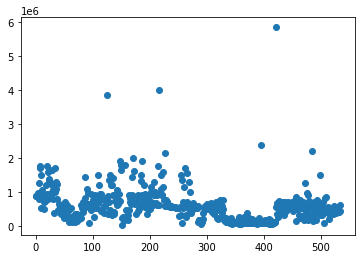

In [8]:
print(df_ohe.iloc[:, 3])
s = df_ohe.iloc[:, 3]
plt.scatter( range(535), df_ohe.iloc[:, 3])
plt.show()

In [9]:
text_train, text_test, train_images, test_images = train_test_split(df_ohe, combined_images_array,test_size = 0.20, random_state = 78)

max_price = max(text_train["price"])

y_train = text_train.iloc[:,3].values
y_test = text_test.iloc[:,3].values
text_train = text_train.drop(["price"],axis = 1)
text_test = text_test.drop(["price"],axis = 1)
X_train = text_train.iloc[:,:].values
X_test  = text_test.iloc[:,:].values

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [10]:
train_images = train_images /255.0
test_images  = test_images /255.0
y_train = y_train / max_price
y_test = y_test / max_price

In [68]:
# TEXT BASED MODEL
def Text_NN():
	model_tf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]), # NN layer
    layers.Dense(4, activation='relu', kernel_regularizer='l2'), # NN layer
])
#kernel_regularizer='l2'
	return model_tf


In [82]:
def Image_NN():
    model_im = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(11,11), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='relu')
])


    return model_im

print(test_images.shape)

(107, 64, 64, 3)


Epoch 1/25
11/11 [==============================] - 7s 615ms/step - loss: 1.1072 - r2_score: -126.1475 - val_loss: 0.1432 - val_r2_score: -1.4597
Epoch 2/25
11/11 [==============================] - 7s 600ms/step - loss: 0.0986 - r2_score: -2.0856 - val_loss: 0.1378 - val_r2_score: -1.3465
Epoch 3/25
11/11 [==============================] - 7s 601ms/step - loss: 0.0929 - r2_score: -1.9102 - val_loss: 0.1310 - val_r2_score: -1.1951
Epoch 4/25
11/11 [==============================] - 7s 674ms/step - loss: 0.0864 - r2_score: -1.5016 - val_loss: 0.1235 - val_r2_score: -1.0230
Epoch 5/25
11/11 [==============================] - 9s 798ms/step - loss: 0.0799 - r2_score: -1.1553 - val_loss: 0.1165 - val_r2_score: -0.8454
Epoch 6/25
11/11 [==============================] - 8s 746ms/step - loss: 0.0740 - r2_score: -0.9639 - val_loss: 0.1110 - val_r2_score: -0.7365
Epoch 7/25
11/11 [==============================] - 8s 750ms/step - loss: 0.0694 - r2_score: -0.7908 - val_loss: 0.1056 - val_r2_score

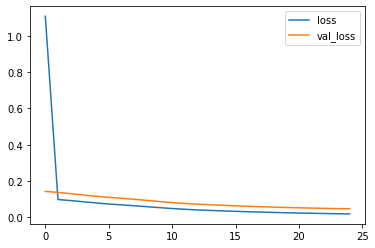

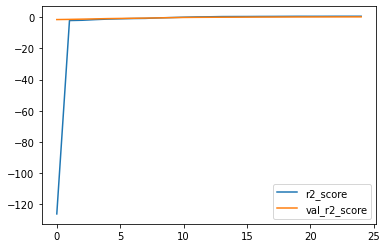

In [70]:
Dense_NN = Text_NN()
CNN = Image_NN()

Multi_Input = concatenate([Dense_NN.output, CNN.output])

End_Net = layers.Dense(4, activation = 'relu')(Multi_Input)
End_Net = layers.Dense(1)(End_Net)

model = Model(inputs = [Dense_NN.input , CNN.input], outputs = End_Net)

# Compiling the model for the following optimizer, loss function, and metrics.
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer= optimizer,
    loss=['mse'],
    metrics=[r2_score],
    run_eagerly=True
)

#Fitting the model
history = model.fit(
    [X_train, train_images], y_train, #Using Standard Scalar Data
    validation_data=([X_test, test_images], y_test), #Using Standard Scalar Data
    batch_size=41,
    epochs=25,
)

#Creating graphs to visualize the loss and accuracy values to check for under-fitting and over-fitting 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['r2_score', 'val_r2_score']].plot();
